# Suicide Detection - Exploratory Data Analysis

### Table of Contents
* [Step 1. Imports](#Step-1:--Imports) 
* [Step 2. Load the Data](#Step-2:--Load-the-Data)
* [Step 3. Explore the Categories](#Step-3:--Explore-the-Categories)
* [Step 4. Length of the Post](#Step-4:--Length-of-Posts)
* [Step 5. Sentiment Analysis](#Step-5:--Sentiment-Analysis)
* [Step 6. Reading Level](#Step-6:-Look-at-Reading-Level)
* [Step 7. Look at Repetition](#Step-7:--Look-at-Repetition)
* [Step 8. Vocabulary - Most Frequent Words](#Step-8:--Vocabulary---Most-Frequent-Words)
* [Step 9. Most Predictive Words](#Step-9:--Most-Predictive-Words)
* [Step 10. Save Cleaned File](#Step-10:--Save-Cleaned-File)

# Step 1:  Imports

In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from six.moves import range
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter

import textstat
import re
import string
# !pip install watermark
#%load_ext watermark
from spacy.lang.en.stop_words import STOP_WORDS

import warnings
warnings.filterwarnings("ignore")


# Step 2:  Load the Data

In [2]:
df = pd.read_csv('Suicide_Detection_DataWrangling.csv')

In [3]:
df.head()

,Unnamed: 0.1,Unnamed: 0,text,class,word,clean_text
0,0,2,ex wife threatening suiciderecently i left my ...,suicide,"['ex', 'wife', 'threatening', 'suiciderecently...",ex wife threatening suiciderecently left wife ...
1,1,3,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'affected', 'compliment', 'coming', ...",weird affected compliment coming know irl feel...
2,2,4,finally is almost over so i can never hear h...,non-suicide,"['finally', 'hear', 'bad', 'year', 'swear', 'f...",finally hear bad year swear fucking god annoying
3,3,8,i need helpjust help me im crying so hard,suicide,"['need', 'helpjust', 'help', 'im', 'cry', 'hard']",need helpjust help im cry hard
4,4,9,i am so losthello my name is adam and i have ...,suicide,"['losthello', 'adam', 'struggling', 'year', 'a...",losthello adam struggling year afraid past yea...


# Step 3:  Explore the Categories

In [4]:
df['class'].value_counts()

suicide        116037
non-suicide    116037
Name: class, dtype: int64

In [5]:
n_postings = len(df)
print("Number of posts: {:d}".format(n_postings))

Number of posts: 232074


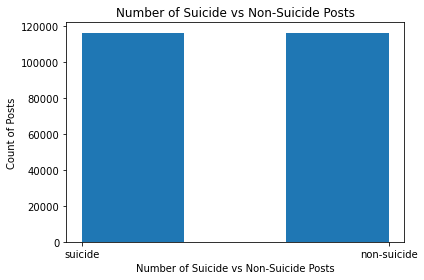

In [6]:
plt.hist(df['class'], bins=3);
plt.xlabel('Number of Suicide vs Non-Suicide Posts')
plt.ylabel('Count of Posts')
plt.title('Number of Suicide vs Non-Suicide Posts')

plt.tight_layout()
plt.savefig('Balanced_Data_Set.png')

We have a total of 232,074 posts with an equal number from each category. This is an extremely balanced data set.

# Step 4:  Length of Posts

In [7]:
df.dropna(inplace = True)

In [8]:
df['clean_text'].apply(len).min()

1

In [9]:
df['clean_text'].apply(len).max()

599479

In [10]:
post_length = df['clean_text'].apply(len).mean()
print("Average Post Length: " + str(post_length))

suicide_length = df['clean_text'][df['class'] == 'suicide'].apply(len).mean()
print("Average length of post in suicide forum: " + str(suicide_length))

non_suicide_length = df['clean_text'][df['class'] != 'suicide'].apply(len).mean()
print("Average length of post in teenage forum: " + str(non_suicide_length))

Average Post Length: 343.99299707816556
Average length of post in suicide forum: 497.886916201984
Average length of post in teenage forum: 190.08316022651852


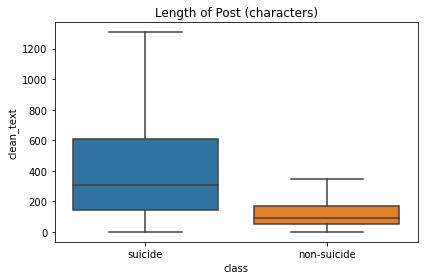

In [11]:
len_text = df['clean_text'].apply(len)
sns.boxplot(x=df['class'],y=len_text, showfliers = False).set_title("Length of Post (characters)")
plt.tight_layout()
plt.savefig('Length_of_post.png')

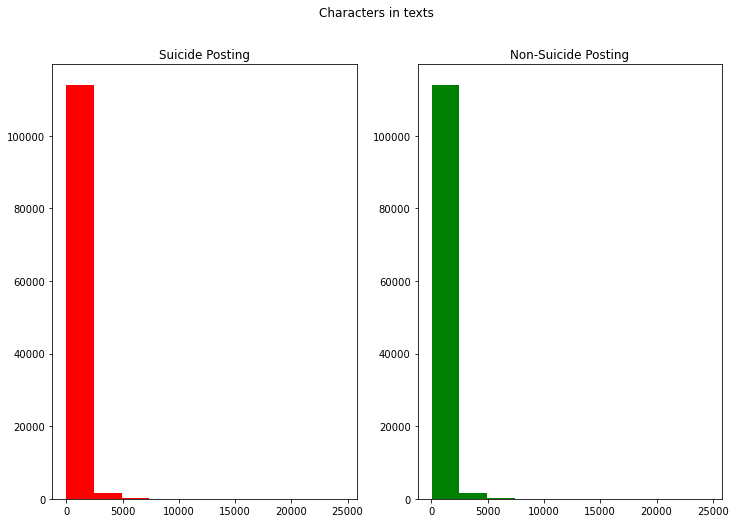

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['class']=='suicide']['clean_text'].str.len()
ax1.hist(text_len,color='red')
ax1.set_title('Suicide Posting')
text_len=df[df['class']=='suicide']['clean_text'].str.len()
ax2.hist(text_len,color='green')
ax2.set_title('Non-Suicide Posting')
fig.suptitle('Characters in texts')
plt.show()

In [13]:
import scipy.stats as stats
stats.ttest_ind(df['clean_text'][df['class'] == 'suicide'].apply(len), df['clean_text'][df['class'] != 'suicide'].apply(len))

Ttest_indResult(statistic=46.12663504971399, pvalue=0.0)

The average length of the posts in the suicide forum are much longer than the average length of posts in the teenager forum.  A t-test confirms the differences are statistically different.  Therefore we will go ahead and add a column to our dataframe to indicate the length of the post.  

In [14]:
df['length'] = ''

In [15]:
for i in range(len(df)):
    length = len(df['clean_text'].iloc[i])
    df['length'].iloc[i] = length

In [16]:
df.head()

,Unnamed: 0.1,Unnamed: 0,text,class,word,clean_text,length
0,0,2,ex wife threatening suiciderecently i left my ...,suicide,"['ex', 'wife', 'threatening', 'suiciderecently...",ex wife threatening suiciderecently left wife ...,345
1,1,3,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'affected', 'compliment', 'coming', ...",weird affected compliment coming know irl feel...,69
2,2,4,finally is almost over so i can never hear h...,non-suicide,"['finally', 'hear', 'bad', 'year', 'swear', 'f...",finally hear bad year swear fucking god annoying,48
3,3,8,i need helpjust help me im crying so hard,suicide,"['need', 'helpjust', 'help', 'im', 'cry', 'hard']",need helpjust help im cry hard,30
4,4,9,i am so losthello my name is adam and i have ...,suicide,"['losthello', 'adam', 'struggling', 'year', 'a...",losthello adam struggling year afraid past yea...,1275


# Step 5:  Sentiment Analysis

In [17]:
from textblob import TextBlob

text = 'I really like it here at camp. All the councelors are great and I am making some friends.  All the boys are hot and the facilities are great.  I love it here.  However, the food is terrible'

blob_text = TextBlob(text)
polarity = blob_text.polarity
print(polarity)

0.2583333333333333


In [18]:
### insert column to collect sentiment analysis
df['sentiment'] = ''

In [19]:
for i in range(len(df)):
    df['sentiment'].iloc[i] = TextBlob(df['clean_text'].iloc[i]).polarity

In [20]:
df['sentiment'].isna().sum()

0

In [21]:
df.head()

,Unnamed: 0.1,Unnamed: 0,text,class,word,clean_text,length,sentiment
0,0,2,ex wife threatening suiciderecently i left my ...,suicide,"['ex', 'wife', 'threatening', 'suiciderecently...",ex wife threatening suiciderecently left wife ...,345,0.1
1,1,3,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'affected', 'compliment', 'coming', ...",weird affected compliment coming know irl feel...,69,0.1
2,2,4,finally is almost over so i can never hear h...,non-suicide,"['finally', 'hear', 'bad', 'year', 'swear', 'f...",finally hear bad year swear fucking god annoying,48,-0.525
3,3,8,i need helpjust help me im crying so hard,suicide,"['need', 'helpjust', 'help', 'im', 'cry', 'hard']",need helpjust help im cry hard,30,-0.291667
4,4,9,i am so losthello my name is adam and i have ...,suicide,"['losthello', 'adam', 'struggling', 'year', 'a...",losthello adam struggling year afraid past yea...,1275,-0.228461


In [22]:
suicide_sentiment = df['sentiment'][df['class'] == 'suicide'].mean()
non_suicide_sentiment = df['sentiment'][df['class'] != 'suicide'].mean()

In [23]:
print('average sentiment of post in suicide forum: ' + str(suicide_sentiment))
print('average sentiment of post in teenage forum: ' + str(non_suicide_sentiment))

average sentiment of post in suicide forum: -0.02231104057881144
average sentiment of post in teenage forum: 0.029959718594643827


In [24]:
df_suicide = df[df['class'] == 'suicide']
df_non_suicide = df[df['class'] != 'suicide']

import scipy.stats as stats
stats.ttest_ind(df_non_suicide['sentiment'], df_suicide['sentiment'])

Ttest_indResult(statistic=47.75961122934747, pvalue=0.0)

Apparently the difference between these two groups is also statistically significant.

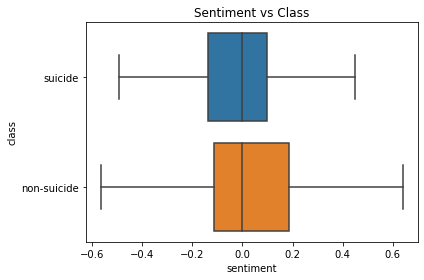

In [25]:
sns.boxplot(x = 'sentiment', y = 'class', data = df, showfliers = False)
plt.title('Sentiment vs Class')


plt.tight_layout()
plt.savefig('Sentiment_v_class.png')

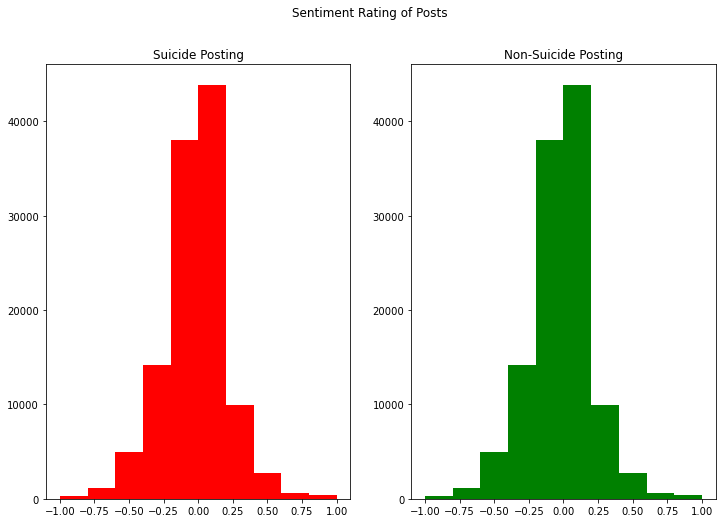

In [26]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_sent=df[df['class']=='suicide']['sentiment']
ax1.hist(text_sent,color='red')
ax1.set_title('Suicide Posting')
text_sent=df[df['class']=='suicide']['sentiment']
ax2.hist(text_sent,color='green')
ax2.set_title('Non-Suicide Posting')
fig.suptitle('Sentiment Rating of Posts')
plt.show()

# Step 6: Look at Reading Level

In [27]:
df_non_suicide = df[df['class'] != 'suicide']

In [28]:
df_suicide = df[df['class'] == 'suicide']

In [29]:
lista = []
for iter in range(len(df_non_suicide)):
    lista.append(textstat.flesch_kincaid_grade(df_non_suicide['clean_text'].iloc[iter]))

print(np.mean(lista))

17.6375126059112


In [30]:
listb = []
for iter in range(len(df_non_suicide)):
    listb.append(textstat.flesch_kincaid_grade(df_suicide['clean_text'].iloc[iter]))

print(np.mean(listb))

32.63555599610402


In [31]:
stats.ttest_ind(lista, listb)

Ttest_indResult(statistic=-9.376979888025199, pvalue=6.847008654031061e-21)

Interesting.  The mean Flesch Kincaid Grade for postings in the 'suicide' forum are higher than the Grade for postings in the 'teenage' forum.  The difference is statistically significant according to the t-test.  We will go ahead and include a column for Flesch_Kincaid 

In [32]:
df['flesch_kincaid'] = ''

In [33]:
for i in range(len(df)):
    df['flesch_kincaid'].iloc[i] = textstat.flesch_kincaid_grade(df['clean_text'].iloc[i])

In [34]:
df.head()

,Unnamed: 0.1,Unnamed: 0,text,class,word,clean_text,length,sentiment,flesch_kincaid
0,0,2,ex wife threatening suiciderecently i left my ...,suicide,"['ex', 'wife', 'threatening', 'suiciderecently...",ex wife threatening suiciderecently left wife ...,345,0.1,24.4
1,1,3,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'affected', 'compliment', 'coming', ...",weird affected compliment coming know irl feel...,69,0.1,8.4
2,2,4,finally is almost over so i can never hear h...,non-suicide,"['finally', 'hear', 'bad', 'year', 'swear', 'f...",finally hear bad year swear fucking god annoying,48,-0.525,6.4
3,3,8,i need helpjust help me im crying so hard,suicide,"['need', 'helpjust', 'help', 'im', 'cry', 'hard']",need helpjust help im cry hard,30,-0.291667,-1.5
4,4,9,i am so losthello my name is adam and i have ...,suicide,"['losthello', 'adam', 'struggling', 'year', 'a...",losthello adam struggling year afraid past yea...,1275,-0.228461,73.9


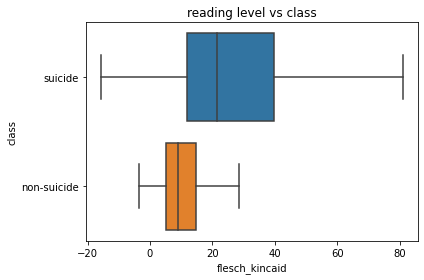

In [35]:
sns.boxplot(x = 'flesch_kincaid', y = 'class', data = df, showfliers=False)
plt.title('reading level vs class')

plt.tight_layout()
plt.savefig('Reading_Level_v_class.png')

# Step 7:  Look at Repetition

Sometimes writers will use repeated words for emphasis.  A mad mad mad mad world has more emphasis than a mad world.

In [36]:
df['repetition'] = ''

In [37]:
for item in range(len(df)):

    words = df['clean_text'].iloc[item].split(" ")  
   
    
    count = 0; 
    for i in range(len(words)-1):  
        if words[i] == words[i+1]:
            count = count + 1

    df['repetition'].iloc[item] = count

In [38]:
df.head(4)

,Unnamed: 0.1,Unnamed: 0,text,class,word,clean_text,length,sentiment,flesch_kincaid,repetition
0,0,2,ex wife threatening suiciderecently i left my ...,suicide,"['ex', 'wife', 'threatening', 'suiciderecently...",ex wife threatening suiciderecently left wife ...,345,0.1,24.4,0
1,1,3,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'affected', 'compliment', 'coming', ...",weird affected compliment coming know irl feel...,69,0.1,8.4,0
2,2,4,finally is almost over so i can never hear h...,non-suicide,"['finally', 'hear', 'bad', 'year', 'swear', 'f...",finally hear bad year swear fucking god annoying,48,-0.525,6.4,0
3,3,8,i need helpjust help me im crying so hard,suicide,"['need', 'helpjust', 'help', 'im', 'cry', 'hard']",need helpjust help im cry hard,30,-0.291667,-1.5,0


In [39]:
print(df['repetition'][df['class'] == 'suicide'].std())
print(df['repetition'][df['class'] != 'suicide'].std())

7.326647067571617
33.971880026953585


In [40]:
print(df['repetition'][df['class'] == 'suicide'].mean())
print(df['repetition'][df['class'] != 'suicide'].mean())

0.5111308379801601
1.0960893662135722


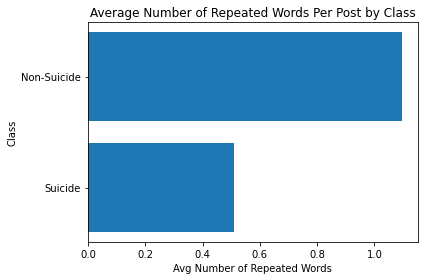

In [41]:
plt.barh(['Suicide', 'Non-Suicide'], [df['repetition'][df['class'] == 'suicide'].mean(), df['repetition'][df['class'] != 'suicide'].mean()])
plt.title('Average Number of Repeated Words Per Post by Class')
plt.ylabel('Class')
plt.xlabel('Avg Number of Repeated Words')

plt.tight_layout()
plt.savefig('Repeated_words_by_class.png')

In [42]:
print(len(df[df['repetition'] == 0]) / len(df))

0.8004835248183549


In [43]:
df_rep = df[df['repetition'] != 0]

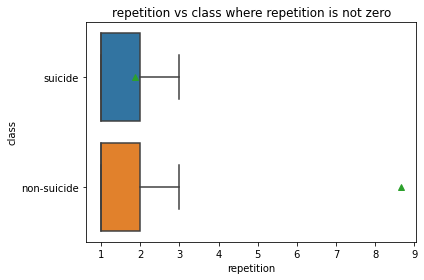

In [44]:
sns.boxplot(x = 'repetition', y = 'class', data = df_rep, showmeans = True, showfliers = False)
plt.title('repetition vs class where repetition is not zero')

plt.tight_layout()
plt.savefig('Repetition_v_class.png')

In [45]:
df_suicide = df[df['class'] == 'suicide']
df_non_suicide = df[df['class'] != 'suicide']


stats.ttest_ind(df_non_suicide['repetition'], df_suicide['repetition'])

Ttest_indResult(statistic=5.733443327407702, pvalue=9.85334804087362e-09)

# Step 8:  Vocabulary - Most Frequent Words

In [46]:
suicide_words = df_suicide['clean_text']
non_suicide_words = df_non_suicide['clean_text']

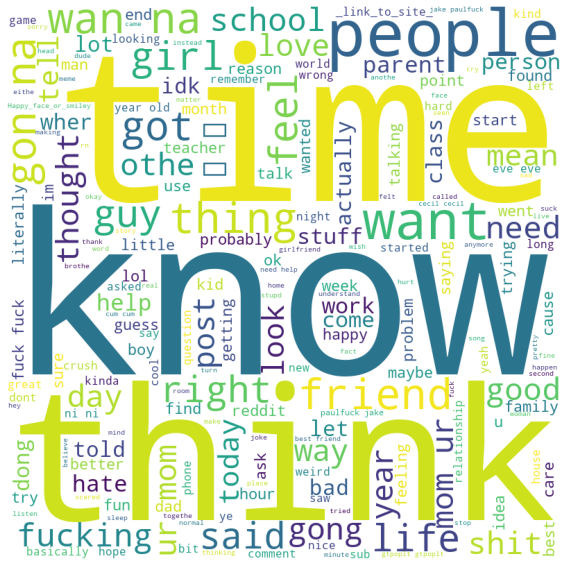

In [47]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
lsit2n = ['𒐫','”', '“']

for val in df['clean_text'][df['class'] != 'suicide']:
    
    val = str(val)
    tokens = val.split()  
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords.update(lsit2n),
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.tight_layout()
plt.savefig('Non_Suicide_Word_Cloud_Frequency.png')

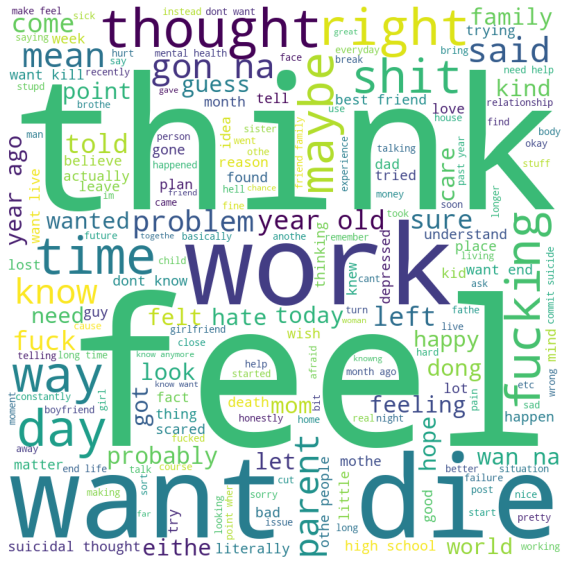

In [48]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in df['clean_text'][df['class'] == 'suicide']:
    val = str(val)
    tokens = val.split()   
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.tight_layout()
plt.savefig('Suicide_Word_Cloud_Frequency.png')

# Step 9:  Most Predictive Words

### First using Naive Bayes

In [49]:
df['clean_text'].fillna("abcdefg", inplace = True)

In [50]:
df.head()

,Unnamed: 0.1,Unnamed: 0,text,class,word,clean_text,length,sentiment,flesch_kincaid,repetition
0,0,2,ex wife threatening suiciderecently i left my ...,suicide,"['ex', 'wife', 'threatening', 'suiciderecently...",ex wife threatening suiciderecently left wife ...,345,0.1,24.4,0
1,1,3,am i weird i do not get affected by compliment...,non-suicide,"['weird', 'affected', 'compliment', 'coming', ...",weird affected compliment coming know irl feel...,69,0.1,8.4,0
2,2,4,finally is almost over so i can never hear h...,non-suicide,"['finally', 'hear', 'bad', 'year', 'swear', 'f...",finally hear bad year swear fucking god annoying,48,-0.525,6.4,0
3,3,8,i need helpjust help me im crying so hard,suicide,"['need', 'helpjust', 'help', 'im', 'cry', 'hard']",need helpjust help im cry hard,30,-0.291667,-1.5,0
4,4,9,i am so losthello my name is adam and i have ...,suicide,"['losthello', 'adam', 'struggling', 'year', 'a...",losthello adam struggling year afraid past yea...,1275,-0.228461,73.9,2


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232046 entries, 0 to 232073
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0.1    232046 non-null  int64 
 1   Unnamed: 0      232046 non-null  int64 
 2   text            232046 non-null  object
 3   class           232046 non-null  object
 4   word            232046 non-null  object
 5   clean_text      232046 non-null  object
 6   length          232046 non-null  object
 7   sentiment       232046 non-null  object
 8   flesch_kincaid  232046 non-null  object
 9   repetition      232046 non-null  object
dtypes: int64(2), object(8)
memory usage: 19.5+ MB


In [52]:
df_samp = df.head(200000)

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Create term-document matrix2with CountVectorizer
vectorizer = CountVectorizer(min_df=60)
X = vectorizer.fit_transform(df['clean_text'])
X = X.tocsc() 
y = df['class']


# Train a predictive model on the matrix
clf = MultinomialNB()
clf.fit(X, y)

MultinomialNB()

In [54]:
#  Create an identity matrix the length of the vocabulary
from scipy.sparse import identity

x = np.eye(X.shape[1])


In [55]:
# Use your model to predict on the identity matrix and get a list of probabilities for each word.
words = np.array(vectorizer.get_feature_names())

probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)


good_words = words[ind[:25]]
bad_words = words[ind[-25:]]

good_prob = probs[ind[:25]]
bad_prob = probs[ind[-25:]]

print("Suicide words\t     P(suicide | word)")
for w, p in zip(good_words, good_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
print("Teenage words\t     P(suicide | word)")
for w, p in zip(bad_words, bad_prob):
    print("{:>20}".format(w), "{:.2f}".format(1 - np.exp(p)))
    
    


Suicide words	     P(suicide | word)
              fiance 0.99
              benzos 0.99
              faggot 0.98
           platitude 0.98
          wellbutrin 0.98
            retarded 0.98
                 dbt 0.97
            ideation 0.97
               xpost 0.97
              ativan 0.97
            slitting 0.97
           medicated 0.97
             aspirin 0.97
             effexor 0.97
        nonexistence 0.97
          outpatient 0.97
           inpatient 0.97
             lexapro 0.97
               lease 0.97
      hospitalzation 0.97
              retard 0.97
              ambien 0.96
       acetaminophen 0.96
                 oxy 0.96
              opiate 0.96
Teenage words	     P(suicide | word)
                icon 0.01
          rteenagers 0.00
smiling_face_with_sunglasses 0.00
                ight 0.00
            valorant 0.00
               shrek 0.00
              rmemes 0.00
                 owo 0.00
                snoo 0.00
              kahoot 0.00
        

In [56]:
suicide_d = {good_words[i]: good_prob[i] for i in range(len(good_words))}

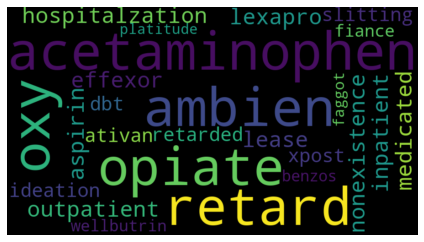

In [57]:
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(suicide_d)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig('Suicide_Word_Cloud_Predictive.png')

In [58]:
non_suicide_d = {bad_words[i]: bad_prob[i] for i in range(len(bad_words))}

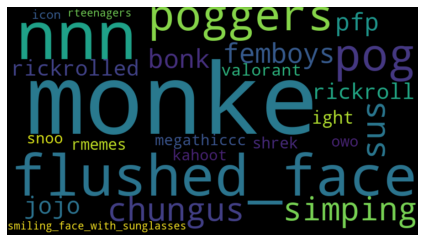

In [59]:
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(non_suicide_d)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig('Non_suicide_Word_Cloud_Predictive.png')

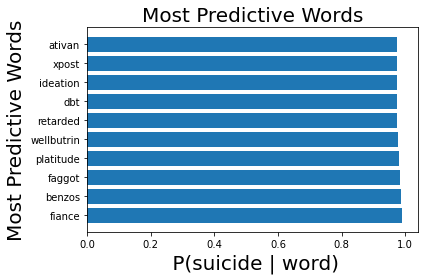

In [60]:
plt.barh(good_words[:10], 1 - np.exp(good_prob[:10]))
plt.rcParams.update({'figure.figsize': (2.5, 2.0)})
plt.xlabel(' P(suicide | word)', fontsize=20)
plt.ylabel('Most Predictive Words', fontsize=20)
plt.title('Most Predictive Words', fontsize=20)

plt.tight_layout()
plt.savefig('Most_predictive_words_bar_chart.png')

In [61]:
# The remainder of this notebook is used to analyze posts that include some of the most predictive words.  

In [62]:
for i in range(0, 60000):
    if 'ativan ' in df['text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 38:  revenge suicidedoes the thought ever cross your mind do you ever alone isolated uncared for do you feel like youve reached out over and over and over and yet no one hears you or takes you seriously do you ever feel like everyone in your life has given up on you

i feel like jumping off this roof right now is the only way anyone will ever notice or care about how much pain i feel no onewill care until im dead and then people will finally hear me they will understand i was serious theyll understand how much pain im in right now theyll wish they would have tried harder to listen every time i spoke about hurting myself or endng my life over the past twelve months

i may be dead i may never be her to see it butpeople will finally care peop'e will finally notice my pain and itll be okay because ill be dead and because the wont be any more pain the wont be any more anything and thats really really okay

im a coward im an enormou fucking coward but im sitting up her on this roof

iteration 38340:  i think i am done sort of felt like finally we would found the right combination of medicine but now i just feel strange i feel like nothing is real however i felt like nothing was real even before all this

i am just so tired i feel bad for my boyfriend who has to listen to this i feel exhausted it is so hard to get up in the morning i was so angry at my anxiety disorder yesterday because i could not make myself go see a movie on my own so i took mg ativan in the hopes of really removing my anxiety for just a little while but instead entered a strange deliriously drunklike stage i spoke to my boyfriend this morning and i said things to him that i do not remember saying

i am so exhausted i never thought i would make it so far in life and now i am her and i am alive and i do not know what to do i have a theapist i am on three types of medication i have anxiety and depression the suicidal thoughts are not nearly as bad on this new combo of medication but i still find m

In [63]:
for i in range(0, 60000):
    if 'xpost ' in df['text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 4861:  terrified i will die after christmas but i do not want to xpost from roffmychesta few of the commenters on roffmychest when i posted this the directed me to her all help is welcome 

i am at a loss of what to do i just am very tired of failing after trying so hard all the time people say if you fall off the horse just get back on but at what point do you realize that maybe you are not made for riding horses i am just not good at dealing with people i can not deal with women anymore i have continually failed and been rejected i have tried to change seemingly everything worked out and gotten in shape i have a good job that makes good money i try to be supportive while still being my own person i used to have confidence but a string of unfaithful partners destroyed that i just do not know what to do i have loyal friends and good parents but i no one ever loves me in a romantic sense i do not want to die but i have just lost motivation to keep gong i have always tried to l

iteration 34726:  xpost from rsurvivorsofabuse i have no hope for the future anymore i really want to die broke up with my abusive partner about  months a go and moved away to the othe side of the country to live with my family again about  months a go things were meant to get better but they just have not i still feel so isolated i feel like none of our friends believe that she was abusive in fact many think i am a dick for calling her manipulative and controlling i do not know how to trust people anymore i do not know how to set boundaries so i will probably get stepped on again i get stepped on at home by my brothe i have to go back to my old city this month to retake my exams as i fucked up this year of uni but i can not concentrate at all so i am gong to fail again most my friends live with my abuser so i have no wher to stay i am gong to need support from my friends so will no doubt be in contact with her again i can not bare the thought she still lies to them about me she still 

iteration 53941:  after  years i just honestly think it is time to quit xpost from rdepression had posted this to the depression sub but after a day  and it getting buried i just deleted it cause no one read it anyway like no one will probably read this cause it is so long but whatever

i will be turning  year and lucky to get to  but really i have been dead since 

it took  years just to get a proper real diagnosis wegener is granulomatosis an atypical case though which is why it took so long and went unmissed that insurancefinancial issues wegener is is an autommune disease symptoms treatable shortened lifespan no cure generally has lung and kidney involvement neithe of which i had in the beginning but in atypical cases can attack the sinus and eyes which it did in me

after nearly  years of this pain and bs having to sign on to disability then my mom dying brothe left for florida dad getting sick and every real life friend having faded away after getting tired of me being sick also 

In [64]:
for i in range(0, 6000):
    if 'ideation ' in df['text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 99:  that is the oldest i have ever been it is the oldest i am ever meant to be


i do not remember when i had the first dream it probably happened when i was so young that i would not even be able to remember they are always fragmented and real… real in the way that when it ends your eyes open and you are lying in bed wondering


“did i just wake up… or just fall asleep”


the fragments do not seem to follow a timeline just clips like a hazy recollection of a night out remembering moments out of a long series of events


in these dreams i have seen the events of my life tragic and wonderful play out before me sometimes months or years before they are experienced in the chronological timeline


it took time to get used to having these dreams especially the dark ones the ones wher a friend or family member passes and i am forced to spectate as a silent observer in their final moments it was not until my teens that i felt like i understood what they were as stupd as it sounds c

In [65]:
for i in range(0, 6000):
    if 'dbt ' in df['text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 213:  how to silence the thoughtspretty consistently i find myself hardly hearing or listening to people i find myself wanting to die almost all the time or like warn people that i am involuntarily awful that everyone leaves eventually i find myself narrating my thoughts and life while othes are talking i dont know maybe i am alone in this but if im not how the fuck do i remain present anymore all i can think about are the negatives i practice dbt but it doesnt help
----------------------------------------------------------------------------------------------------
 
iteration 1004:  i am never enough think i am gonna try again i can not do this anymore i am inadequate in school i was the weird kid no one wanted to fw i ate lunch in the girls bathroom the majority of th grade in high school i attempted suicide multiple times one of the attempts landing me in a coma for  days but i have been to the psych ward countless times i have been to dbt theapy cbt and i have tried so ha

In [66]:
for i in range(0, 6000):
    if 'retarded ' in df['text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 254:  how do i give support for someone i am growing to despiselittle backgrounTongue_sticking_out_cheeky_playful_or_blowing_a_raspberry few years ago my parents got a divorce and my mom began a somewhat abusive relationship with someone last year my dad died

shortly before my dad is funeral it became evident to my mom that she was being cheated on and the dude was gong to leave her so at our dad is funeral my mom was crying not because her exhusband had died but because her boyfriend had left her i know that my parents marriage had ended and she did not need to feel bad about it but to me it was extremelly disrespectful to me and my siblings  at the moment nobody knew why she was so sad few days later we were stil mourning our dad is death and the reason for her sadness showed up

now because her boyfriend have left her she is treatning to kill herself jesus christ my  years old mothe is treatning to kill herself because her  years old boyfriend have left her

she became in

iteration 4652:  i am a burden to you alli have tried posting in these kinds of forums before and i barely if ever get advice or friendly words usually my posts are ignored or mocked i can not live with being ignored any longer 

first of all i have a lot of issues and i can not go to a theapist about them why because i am a fucking coward that is why i was on a list for about a year regarding my anxiety depression and loneliness guess what the fucking loser that is me as soon as he got somebody willing to help him fucking cancelled it you know why because the theapists issued to me all worked normal work hours and if i wanted to see her i would have to tell my employer the real reason why i needed to take time off i realized i would literally rathe end my life than tell people at my work what was up with me and that fact persists today

i am not gong to say it is not my fault because it is i am a kissless virgin because i have never even approached a girl not even talked to one in the

In [67]:
for i in range(0, 16000):
    if 'wellbutrin ' in df['text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 2030:  monthsi can not believe it is  my depression began at the end of  in an attempt to get better i have been seeing a psychiatrist  times per month and for a stretch of six months i met with both a psychologist and a life coach 

with my doctor is help i have tried various cocktails of zoloft lexapro abilify lamictal wellbutrin adderall and ativan none have helped my depression in a significant way i have leaned on friends and family for support improved my diet and learned mindfulness meditation but i must admit i was never able to stick to the meditation for more than a week at a time

in short i spent the last  months trying to get rid of my depression but her i am tonight on suicidewatch feeling as bad as i have ever felt

i attempted to take my life last year but my kidneys and liver were stronger than i gave them credit for if i try again it will be with the help of the golden gate bridge which i am told is  effective

i know that if i continue to fight the is still

i am not sure what i am dong telling everyone her this but i figure i will try anything right now
----------------------------------------------------------------------------------------------------
 
iteration 15992:  the inevitabletwo major causes for issues right now written as two separate paragraphs

at about the age of  i felt that sinking feeling that i really was gay and not just confused shortly after that i became a closeted proud gay teen waitng for the right time to come out as time went on i began to feel more and more depressed and started cutting my arm this whole time i was feeling furthe and furthe away from god and not because i felt he abandoned me but that i abandoned him i had not been to church in  six years save for special holidays or funeral is i got back into churchand started really praying and studying into what god was showing me on homosexuality i had decided that the best way for me to honor the lord was to pursue a celibate lifestyle as time went on i go

In [68]:
for i in range(0, 56000):
    if 'platitude ' in df['text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 5679:  i do not just want to die to stop hurting i want to die to punish everyone around me including youi want my dad to find my asphyxiated corpse in the garage after he gets home from the christmas party  that is what he gets for constantly calling me ungrateful critcizing me and telling me that i can not do anything right

then i want him to call my exwife who left me and took my children right when i needed them most  when i hit rock bottom she had a responsibility to help me through it  instead she bailed and encouraged my kids to stop talking to me  when she calls she lumps on shitty platitude after shitty platitude about why i should keep gong then she proceeds to ignore me or engage me in any meaningful conversation about us or what she is done to hurt me over  years of our sham of a marriage

i want to punish my gossipy neighbors for spreading rumors about me  let them be the eons who now have to spend years consoling my dad over this and let them know why

and i al

In [69]:
for i in range(0, 16000):
    if 'faggot ' in df['text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 873:  i just need someone to listen to meback story i am  i have been suffering from depression for  or  years but i do not want to go back to the doctor because i am scared that they will not take me seriously and think i am just anothe teenager i have never talked about my problems to anyone else because when i try i freeze and am unable to say anything over the past couple of years i have tried to kill myself over  times including pills and alcohol and trying to drown myself 

now to my current problems

i came out at gay when i finished my gcse is at  all my friends said they did not care and all but within  months i only had  or  friends that would still talk to me when i went back to the school to pick up my gcse certificates about  people all my old friends and classmates included started shoutng insults like faggot and queer right up until i was  minutes down the road and could not hear them any more my best friend at the time stopped talking to me about  or  months a

iteration 14002:  i am so done i am just so done absolutely positvely fucking done can not sleep at night because i get rls whenever i try and then wake up  times because of night terrors if i do manage to fall asleep so i am tired literally all the time i have zero goals in life nothing i enjoy dong besides gong home and playing video games nothing i wanna go to college for no job that i want my grades are terrible and my parents called me a disappointment everyone nonstop shit talks me i might have gotten hacked recently the few friends i have are overshadowed by the literal dozens of people who hate me and think i am a toxic piece of shit i have driven so many people away im a shitty boyfriend because my girlfriend always wants to go out and do stuff with me but i just want to stay at home and have her come over or go to her house one of my long distance friends committed suicide i am a shitty friend and usually take excruciatingly long amounts of time to respond to anyone who texts

In [70]:
for i in range(0, 16000):
    if 'benzos ' in df['text'].iloc[i] and df['class'].iloc[i]  == 'suicide':
        print('iteration ' + str(i) + ':  ' + df['text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")

iteration 1260:  i have nothing left tried to improve my life by stopping drinking and benzos  days in i had  seizures and spent a few days in the hospital i fell and fucked my back up pretty bad when i had the second one i wake up in agony every day it hurts to walk i cant afford to go to a doctor

ive  been sober  days and my life has gone downhill dramatically i am being evicted in a few days i have nowher to go my family hates me they have a huge house but do not want me around i got out of the hospital with a smile on my face it is been soooo long since i have been surrounded by nice smart people the nurses were great 




i have been a drunk for  years i have not worked i have done nothing my sister got pregnant and had to move back home my dads wife left him we are all broke my sister does not want me around eithe i went over the tonight and she called the cops second time in a week they told me to leave or they would arrest me on my way out they pulled me over and gave me a  ti

iteration 13114:  i feel like i might just end my life soon not like it is not an end i am living in already constantly told my psychiatrists i did not want to be on meds longterm and i had doubts about being on meds at all

one day i was feeling depressive and this is probably gibberish thinking in retrospect but i decided i would get better care at a hospital i went the and he the psychiatrist i loathe prescribed me risperidone i anxiously ate it up over that month i grew weight and developed stretchmarks at home i noticed my breasts hurt my gp ordered a prolactin test and lo it was increased 

then i switched to sertindole after a rough week in the unit with coldturkey lorazepam mg for a while and i started reading more about what these meds both antipsychotics and benzos can do to your body so i decide to taper off the benzo i did not want to repeat the unit stay with him

i managed to taper down to mg everything was gong cool i set my eyes on mg sertindole i was prescribed mg but 

In [71]:
for i in range(0, 16000):
    if 'fiance ' in df['text'].iloc[i]:
        print('iteration ' + str(i) + ':  ' + df['text'].iloc[i])
        print("----------------------------------------------------------------------------------------------------")
        print(" ")
        

iteration 1368:  i fail at lifeyeah that is it i mean i have got some legit issues ptsd anxiety disorder i am on meds i am in theapy but i have my kids' stepmom telling them that she is their real mom and that they should tell me not to come to school activites because she is coming insteadi make a fool of myself in front of people on a regular basis because apparently i have no capacity for interacting with othesmy fiance thinks i am an incompetent idioti can not leave because of my kids right that is what they say but they are already being brainwashed into thinking i am not as important as their stepmom i am trying to assemble the suicide bag thingy and i can not figure out the valvei fail at this too
----------------------------------------------------------------------------------------------------
 
iteration 1831:  ive got nothing leftpast few years have been roughhad my dad uncle and grandad die then my fiance deported not long after
my depression all the while getting wors
jus

iteration 8796:  my fiance of  years left mei have no family outside him ive isolated myself and have no support system i am losing my family and my home and the live of my life i have never felt so alone
----------------------------------------------------------------------------------------------------
 
iteration 8872:  i do not know what to doyesterday i messed up i got wind that my fiance was probably getting the shit scammed out of her she told me about how she has over a million dollars on some off shore bank and it eventually will solve all our problems i am skeptical and concerned since i figured she is not aware that she is probably being had ages ago she told me her email password and i remembered it so i thought i would go and see these emails from this bank lo and behold it is some nigerian prince tier shit with horrible grammar and formatting it was even coming from a gmail address i looked and saw the email history of this she almost had to sell her beloved truck to pay 

iteration 15109:  still not safe from myself posted last week about being dumped by my verbally abusive fiance i made it through the weekend but i am not getting better i still want to die i am afraid to talk to real life friends and family because i do not want to be looked down on i am trying to look strong through this but in reality i have given up on life i miss him so much that it hurts

i have lost everything this weekend i am moving out and living alone in a small apartment i loved my home with him and i hate leavingi do not even have furniture so the place will be empty i am afraid to be alone the afraid of what i might do my will to live is completely gone when i sleep i dream of ways to kill myself when i wake up i dread facing anothe pointless day the only reason i am alive is that i do not want to hurt my family but i resent them for holding me back

help me reddit i am really scared
------------------------------------------------------------------------------------------

# Step 10:  Save Cleaned File

In [72]:
df.to_csv('Suicide_Detection_Cleaned.csv')